# Numerically Solving Schrodinger Equations

<font  face=Times color=darkblue size=4> After showing how to numerically solve the differential equations, we now use the techniques to solve single-particle Schrodinger equations.

## Stationary Schrodinger Equation

### Introduction

<font  face=Times color=darkblue size=4>We first consider stationary Schrodinger Equation, and take 1d harmonic oscillator as an example:$$E\psi(x)=-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}\psi(x)+V(x)\psi(x)$$.
<br>Ater discretization, we take $x_i=i\times dx$,$i\in [0,n+1]$,and then:$$E\psi_i=-\frac{\hbar^2}{2m}\frac{\psi_{i+1}+\psi_{i-1}-2\psi_{i}}{dx^2}+V_i\psi_i$$
    with boundary condition:$\psi_0=\psi_{n+1}=0$
<br>Thus, we get n linear equations, and we can write in matrix form.
<br><br>For 1d harmonic oscillator:$$E\psi_i=-\frac{\hbar^2}{2mdx^2}(\psi_{i+1}+\psi_{i-1})+(\frac{\hbar^2}{mdx^2}+\frac{1}{2}mw^2(i-\frac{n}{2})^2dx^2)\psi_i$$
<br>So, the matrix form is:$E'\begin{bmatrix}
\psi_1  \\ \vdots  \\ \psi_n \\\end{bmatrix}
=\begin{bmatrix} \frac{1}{2}\frac{(1-n/2)^2*dx^2}{HbarM}& -\frac{1}{2}HbarM & \cdots\\ 
-\frac{1}{2}HbarM &\ddots&\cdots  \\ 
\vdots &\vdots&\ddots\\
\end{bmatrix}
\begin{bmatrix}
\psi_1  \\ \vdots  \\ \psi_n \\\end{bmatrix}$
    with $HbarM=\frac{\hbar}{mwdx}, E'=E*dx/(\hbar w)$.
<br><br>Set HbarM=1, dx=0.01, n=200. So, after diagonalization, the eigenvalues are the energies and the eigenvectors are the wavefunctions.

### Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
#set parameter
dx=0.01
n=200

In [85]:
#set the matrix element
the_matrix=np.zeros((200,200))
#row 1:
the_matrix[0,0]=0.99*0.99*0.5+1
the_matrix[0,1]=-0.5
#row n:
the_matrix[n-1,n-1]=0.5+1
the_matrix[n-1,n-2]=-0.5
#other rows
for i in range(1,n-1):
    the_matrix[i,i]=np.power((i+1-100)/100,2)/2+1
    the_matrix[i,i-1]=-0.5
    the_matrix[i,i+1]=-0.5


In [86]:
#diagonalization
E_list,wf_list=np.linalg.eigh(the_matrix)

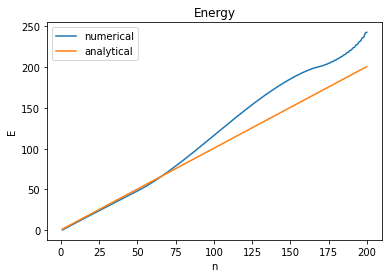

In [89]:
#Energy plot
n_list=np.arange(1,201)
plt.plot(n_list,E_list/0.01,label='numerical')
plt.plot(n_list,n_list+0.5,label='analytical')
plt.xlabel('n')
plt.ylabel('E')
plt.title('Energy')
plt.legend()

<font  face=Times color=darkblue size=4>We can see that, at low energy level, the result is acceptable, but at higher levels, the result get worse.

## Time-Dependent Schrodinger Equation

### Introduction

<font  face=Times color=darkblue size=4>Next, we consider time-dependent Schrodinger equation:$$i\hbar\frac{\partial}{\partial t}\psi(t,x)=H(x)\psi(t,x)$$
<br><br>Using Crank-Nicolson Scheme, the equation can be written as:$$i\hbar\frac{\psi^{n+1}_r-\psi^{n}_r}{\tau}=\sum_{s=1}^NH_{r,s}\frac{1}{2}(\psi_s^n+\psi_s^{n+1})$$
    with $H_{r,s}=-\frac{\hbar^2}{2m}\frac{\delta_{r+1,s}+\delta_{r-1,s}-2\delta_{r,s}}{h^2}+V(x_r)\delta_{r,s}$
<br><br>Further:$$\psi^{n+1}=(1+\frac{i\tau}{2\hbar}H)^{-1}(1-\frac{i\tau}{2\hbar}H)\psi^n$$
<br><br>Initial condition:$\psi(t=0,x)=\frac{1}{\sqrt{\sigma_0\sqrt{2\pi}}}e^{ik_0x}e^{-\frac{1}{2}\frac{(x-x_0)^2}{2\sigma_0^2}}$,
<br>$\hbar=m=1,x_-10=0,L=40,\sigma_0=1,k_0=7,N=401,\tau=0.0002,h=L/N$, and the potential V inside to be 0.

### Code

In [2]:
#set parameters
hbar=1
m=1
x0=-10
L=40
sigma0=1
k0=7
N=400
tau=0.03
tn=600
h=L/N
x_list=[]
for i in range(N):
    x_list.append(i*h-L/2)

In [3]:
psi_list=np.zeros((tn,N),dtype=np.complex64)
#set psi_0
for i in range(N):
    psi_list[0,i]=(1/np.sqrt(sigma0*np.sqrt(np.pi)))*np.exp((1j)*k0*(x_list[i]-x0))*np.exp(-0.5*np.power(x_list[i]-x0,2)/(np.power(sigma0,2)))

In [4]:
sum=0
for i in psi_list[0]:
    sum+=abs(i)**2*h
print('as the sum of possibility is:',sum,'we can say it is normalized')

as the sum of possibility is: 0.9999999825424379 we can say it is normalized


In [5]:
#build the H matrix
matrix_H=np.zeros((N,N))
#first row
matrix_H[0,0]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[0,1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#last row
matrix_H[N-1,N-1]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[N-1,N-2]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#other rows
for i in range(1,N-1):
    matrix_H[i,i]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
    matrix_H[i,i+1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
    matrix_H[i,i-1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))

In [6]:
# the new matrix in the formula
mat_1plus_inv=np.linalg.inv(np.identity(N)+((1j*tau)/(2*hbar))*matrix_H)
mat_1minus=np.identity(N)-((1j*tau)/(2*hbar))*matrix_H

In [7]:
for i in range(1,tn):
    psi_list[i]=np.dot(np.dot(mat_1plus_inv,mat_1minus),psi_list[i-1].reshape(N,1)).reshape(N,)

In [8]:
import pylab
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


c:\工具\python\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'sum']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
from IPython import display
fig = plt.figure()
plt.ion() 
for index in range(150):
    fig.clf()  # 清空当前Figure对象
    xx=x_list
    yy=abs(psi_list[index*4])**2
    ax1 = fig.add_subplot(111)
    ax1.set_xlabel('x')
    ax1.set_title('possibility(x)')
    ax1.plot(xx,yy)
    plt.pause(0.1)
    #display.clear_output(wait=True)
plt.ioff()
plt.show()

<font  face=Times color=darkblue size=4>Using similar scheme, by adding some potential or change boundary and initial conditions, you can easily check the solution of Schrodinger Equation in other cases.
     <br>For example, take the conditions above unchanged, except that we add rectangular potential barrier of $V=k_0^2/2$ at -2<x<2.

In [6]:
#set parameters
hbar=1
m=1
x0=-10
L=40
sigma0=1
k0=7
N=400
tau=0.03
tn=600
h=L/N
x_list=[]
for i in range(N):
    x_list.append(i*h-L/2)

In [7]:
psi_list=np.zeros((tn,N),dtype=np.complex64)
#set psi_0
for i in range(N):
    psi_list[0,i]=(1/np.sqrt(sigma0*np.sqrt(np.pi)))*np.exp((1j)*k0*(x_list[i]-x0))*np.exp(-0.5*np.power(x_list[i]-x0,2)/(np.power(sigma0,2)))

In [8]:
#build the H matrix (add V)
matrix_H=np.zeros((N,N))
#first row
matrix_H[0,0]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[0,1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#last row
matrix_H[N-1,N-1]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
matrix_H[N-1,N-2]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
#other rows
for i in range(1,N-1):
    matrix_H[i,i]=(-(hbar*hbar)/(2*m))*(-2/np.power(h,2))
    matrix_H[i,i+1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
    matrix_H[i,i-1]=(-(hbar*hbar)/(2*m))*(1/np.power(h,2))
    if 180<i<220:
        matrix_H[i,i]+=k0**2/2

In [9]:
# the new matrix in the formula
mat_1plus_inv=np.linalg.inv(np.identity(N)+((1j*tau)/(2*hbar))*matrix_H)
mat_1minus=np.identity(N)-((1j*tau)/(2*hbar))*matrix_H

In [10]:
for i in range(1,tn):
    psi_list[i]=np.dot(np.dot(mat_1plus_inv,mat_1minus),psi_list[i-1].reshape(N,1)).reshape(N,)

In [11]:
import pylab
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


c:\工具\python\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
from IPython import display
fig = plt.figure()
plt.ion() 
for index in range(150):
    fig.clf()  # 清空当前Figure对象
    xx=x_list
    yy=abs(psi_list[index*4])**2
    ax1 = fig.add_subplot(111)
    ax1.set_xlabel('x')
    ax1.set_title('possibility(x)')
    ax1.plot(xx,yy)
    plt.pause(0.1)
    #display.clear_output(wait=True)
plt.ioff()
plt.show()

<font  face=Times color=darkblue size=4>Now, you could easily see the difference of propogation.